In [3]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), ".."))

import torch

import matplotlib.pyplot as plt

from satellite2map.datasets import Maps
from satellite2map.metricas import *
import satellite2map.transforms as T

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Creating test set

There are 2194 images, from which 1756 will be used as train set, 329 will be used as validation set and 109 will be used as test set

In [4]:
# checking how many images are in the train and validation sets
train_dataset_files = os.listdir("../data/mod/train")
val_dataset_files = os.listdir("../data/mod/val")

print(len(train_dataset_files))

# dividing the dataset into train, validation and test sets
total_imgs = len(train_dataset_files) + len(val_dataset_files)
print(f"Total images: {total_imgs}")
train_dataset_size = int(total_imgs * 0.8)
val_dataset_size = int(total_imgs * 0.15)
test_dataset_size = int(total_imgs * 0.05)
print(f"Train dataset size: {train_dataset_size}")
print(f"Validation dataset size: {val_dataset_size}")
print(f"Test dataset size: {test_dataset_size}")
print(f"Total: {train_dataset_size + val_dataset_size + test_dataset_size}")


1096
Total images: 2194
Train dataset size: 1755
Validation dataset size: 329
Test dataset size: 109
Total: 2193


In [7]:
os.mkdir("../data/mod/test")

In [8]:
# renaming all files in the validation folder to dummy names
val_dataset_files = os.listdir("../data/mod/val")
for i, file in enumerate(val_dataset_files):
    os.rename(f"../data/mod/val/{file}", f"../data/mod/val/dummy_{i}.jpg")

In [9]:
# renaming all files in the validation folder to names starting from 1097.jpg
val_dataset_files = os.listdir("../data/mod/val")
for i, file in enumerate(val_dataset_files):
    os.rename(f"../data/mod/val/{file}", f"../data/mod/val/{i + 1097}.jpg")

In [10]:
# moving files 1097.jpg to 1757.jpg to the train folder
for i in range(1097, 1757):
    os.rename(f"../data/mod/val/{i}.jpg", f"../data/mod/train/{i}.jpg")

In [11]:
# moving files 1757.jpg to 2085.jpg to the val folder
for i in range(1757, 2086):
    os.rename(f"../data/mod/val/{i}.jpg", f"../data/mod/val/{i}.jpg")

In [12]:
# moving files 2085.jpg to 2193.jpg to the train folder
for i in range(2086, 2195):
    os.rename(f"../data/mod/val/{i}.jpg", f"../data/mod/test/{i}.jpg")

# Visualizing New York maps dataset

In [10]:
transforms = T.Compose([T.Resize((256,256)),
                        T.HorizontalFlip(0.5),
                        T.VerticalFlip(0.5),
                        T.ToTensor(),
                        T.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])])

train_dataset = Maps(root='../data/raw', mode='train', transform=transforms, download=False)
val_dataset   = Maps(root='../data/raw', mode='val', transform=transforms, download=False)
test_dataset  = Maps(root='../data/raw', mode='test', transform=transforms, download=False)


1 torch.Size([3, 256, 256]) torch.Size([3, 256, 256])
satellite array: tensor([[[0.1137, 0.1333, 0.1412,  ..., 0.1176, 0.3569, 0.6471],
         [0.4000, 0.3922, 0.3725,  ..., 0.2078, 0.2118, 0.2471],
         [0.2824, 0.3412, 0.4078,  ..., 0.3843, 0.2588, 0.2353],
         ...,
         [0.1098, 0.2353, 0.6745,  ..., 0.2275, 0.3373, 0.2000],
         [0.1176, 0.3412, 0.7882,  ..., 0.3608, 0.4667, 0.4706],
         [0.0863, 0.2118, 0.5725,  ..., 0.4235, 0.4078, 0.4314]],

        [[0.1098, 0.1294, 0.1373,  ..., 0.1176, 0.3569, 0.6471],
         [0.4000, 0.3922, 0.3686,  ..., 0.2118, 0.2118, 0.2471],
         [0.2824, 0.3451, 0.4078,  ..., 0.3882, 0.2588, 0.2353],
         ...,
         [0.0980, 0.2392, 0.6941,  ..., 0.2314, 0.3412, 0.2039],
         [0.1137, 0.3451, 0.8118,  ..., 0.3647, 0.4706, 0.4745],
         [0.0824, 0.2196, 0.6000,  ..., 0.4275, 0.4118, 0.4353]],

        [[0.0941, 0.1137, 0.1216,  ..., 0.0863, 0.3255, 0.6157],
         [0.3725, 0.3647, 0.3412,  ..., 0.1608, 0.16

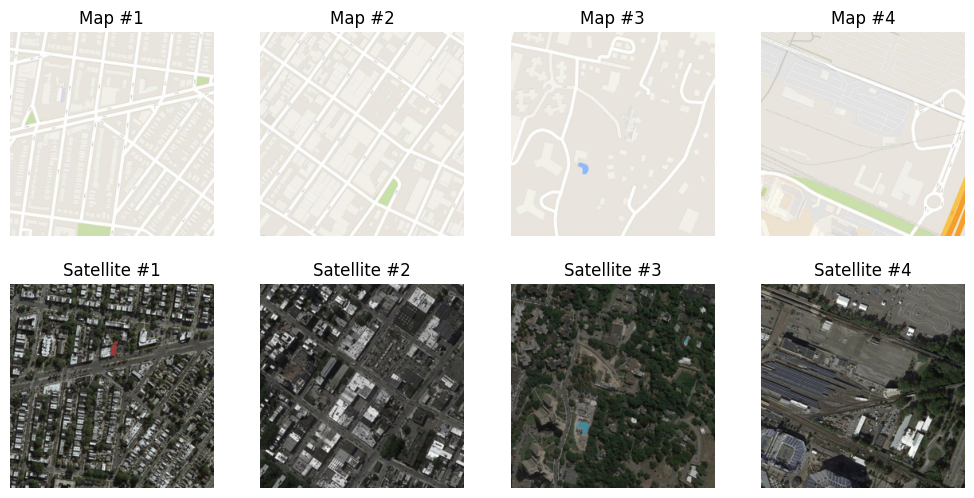

In [11]:
fig = plt.figure(figsize=(10, 10))

for i, (sat, map) in enumerate(train_dataset):
    i = i + 1
    print(i, sat.shape, map.shape)
    sat = sat * 0.5 + 0.5
    map = map * 0.5 + 0.5

    ax = plt.subplot(1, 4, i)
    plt.tight_layout()
    ax.set_title('Satellite #{}'.format(i))
    ax.axis('off')
    plt.imshow(sat.permute(1, 2, 0))

    ax = plt.subplot(2, 4, i)
    plt.tight_layout()
    ax.set_title('Map #{}'.format(i))
    ax.axis('off')
    plt.imshow(map.permute(1, 2, 0))

    print(f"satellite array: {sat}")
    print(f"map array: {map}")

    if i == 4:
        plt.show()
        break